Notebook to train a model with optimized normalization and data sampling

In [1]:
%load_ext tensorboard

import tifffile
import numpy as np
from pathlib import Path
from typing import Union, List, Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch import no_grad, cuda
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms.v2 as transforms_v2

from datetime import datetime

import sys
import os
sys.path.append("/localscratch/project/the_exceptionals/model/")
from unet import UNet

sys.path.append("/localscratch/project/the_exceptionals/util/")
from visualize import show_random_dataset_image_with_prediction

sys.path.append("/localscratch/project/the_exceptionals/data/")
import local
from sampler import show_random_sampler_image, Sampler

from train import train

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
img_dir = "/localscratch/project/data2d/norm_img/train/images"
mask_dir = "/localscratch/project/data2d/train_images2D/masks"

train

In [1]:
import sys
sys.path.append("/localscratch/project/the_exceptionals/data/")

import local
img_dir = "/localscratch/project/data2d/norm_img/train/images"
mask_dir = "/localscratch/project/data2d/train_images2D/masks"
data = local.CellDataset(img_dir, mask_dir)
print(data.weights)
print(data.cropsize)
print(data.cropsize)

10000
256
256


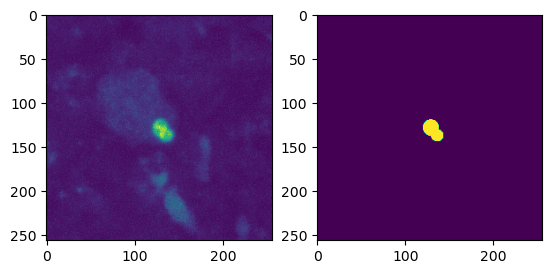

In [2]:
import matplotlib.pyplot as plt
import numpy as np
k=1
data.weights = 10000
for i in range(k):
    image, mask = data.__getitem__(i)
    image_cpu = image.cpu().numpy()
    mask_cpu = mask.cpu().numpy()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.squeeze(image_cpu))
    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(mask_cpu))
    plt.show()

0.9999934

In [3]:
img_dir = "/localscratch/project/data2d/norm_img/train/images"
mask_dir = "/localscratch/project/data2d/train_images2D/masks"

train(img_dir, mask_dir, num_epochs=100)

epoch: 0


/localscratch/miniforge3/envs/exceptional/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Train Epoch: 0 [0/200 (0%)]	Loss: 99.677124
epoch: 1
Train Epoch: 1 [0/200 (0%)]	Loss: 99.338684
epoch: 2
Train Epoch: 2 [0/200 (0%)]	Loss: 99.873047
epoch: 3
Train Epoch: 3 [0/200 (0%)]	Loss: 99.911804
epoch: 4
Train Epoch: 4 [0/200 (0%)]	Loss: 98.874817
epoch: 5
Train Epoch: 5 [0/200 (0%)]	Loss: 99.747925
epoch: 6
Train Epoch: 6 [0/200 (0%)]	Loss: 98.610535
epoch: 7
Train Epoch: 7 [0/200 (0%)]	Loss: 99.783936
epoch: 8
Train Epoch: 8 [0/200 (0%)]	Loss: 98.065186
epoch: 9
Train Epoch: 9 [0/200 (0%)]	Loss: 97.765198
epoch: 10
Train Epoch: 10 [0/200 (0%)]	Loss: 99.389038
epoch: 11
Train Epoch: 11 [0/200 (0%)]	Loss: 98.296509
epoch: 12
Train Epoch: 12 [0/200 (0%)]	Loss: 99.274597
epoch: 13
Train Epoch: 13 [0/200 (0%)]	Loss: 99.773560
epoch: 14
Train Epoch: 14 [0/200 (0%)]	Loss: 99.423523
epoch: 15
Train Epoch: 15 [0/200 (0%)]	Loss: 99.268494
epoch: 16
Train Epoch: 16 [0/200 (0%)]	Loss: 99.024658
epoch: 17
Train Epoch: 17 [0/200 (0%)]	Loss: 99.659424
epoch: 18
Train Epoch: 18 [0/200 (0%)]	

KeyboardInterrupt: 

In [ ]:
trainData = local.CellDataset(img_dir = img_dir,
                            mask_dir = mask_dir
                           )

In [ ]:
loader = DataLoader(trainData, batch_size = 5, num_workers = 8, shuffle = True)

In [ ]:
for batch_id, (x, y) in enumerate(loader):
        # move input and target to the active device (either cpu or gpu)
        x, y = x.to(device), y.to(device)
        print(x.shape)
        print(y.shape)